In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Định nghĩa hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Định nghĩa hàm chi phí (hay hàm mất mát) dựa trên cross - entropy
def compute_cost(Y, Y_hat):
    m = Y.shape[1]
    return -1/m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

# Hồi quy Logistic với Giải thuật Lan truyền ngược

Trong thuật toán này, sử dụng cập nhật theo Gradient Descent:
\begin{align*}
dZ &= A-Y\\
dW &= \frac{1}{n} \cdot dZ \cdot X^T\\
db &= \frac{1}{n} \cdot \sum dZ
\end{align*}

Và quy tắc cập nhật:
\begin{align*}
W &\leftarrow W - \alpha \cdot dW\\
b &\leftarrow b - \alpha \cdot db
\end{align*}

Trong đó $\alpha$ là tốc độ học (learning rate).

# Gradient Descent

In [34]:
def logistic_regression_nn(X, Y, learning_rate, num_iterations):
    m, n = X.shape  # m: số lượng đặc trưng, n: số lượng mẫu dữ liệu
    
    # Bước 1: Khởi tạo tham số
    W = np.random.randn(1, m) * 0.01  # Khởi tạo trọng số với giá trị nhỏ
    b = 0  # Khởi tạo bias
    costs = []  # Lưu giữ giá trị cost sau mỗi lần lặp để vẽ đồ thị
    accuracies = []  # Lưu giữ giá trị độ chính xác sau mỗi lần lặp để vẽ đồ thị
    
    # Bước 2: Lặp qua từng epoch để cập nhật tham số
    for i in range(num_iterations):
        
        # Bước 2.1: Lan truyền tiến để tính output và cost
        Z = np.dot(W, X) + b  # Tính giá trị linear Z
        A = sigmoid(Z)  # Tính giá trị output A sử dụng hàm sigmoid
        cost = compute_cost(Y, A)  # Tính giá trị cost
        costs.append(cost)  # Lưu giữ giá trị cost
        
        # Bước 2.2: Lan truyền ngược để tính gradient
        dZ = A - Y  # Tính đạo hàm của cost theo Z
        dW = 1/n * np.dot(dZ, X.T)  # Tính đạo hàm của cost theo W
        db = 1/n * np.sum(dZ)  # Tính đạo hàm của cost theo b
        
        # Bước 2.3: Cập nhật tham số
        W -= learning_rate * dW  # Cập nhật trọng số W
        b -= learning_rate * db  # Cập nhật bias b
        
        # Bước 2.4: Tính độ chính xác và lưu giữ giá trị
        accuracy = np.mean((A > 0.5) == Y)  # Tính độ chính xác
        accuracies.append(accuracy)  # Lưu giữ giá trị độ chính xác
        
        # In thông tin quá trình huấn luyện
        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

    return W, b, costs, accuracies

In [35]:
# Đọc dữ liệu
data = pd.read_csv("C:\\Users\\admin\\Downloads\\diabetes.csv")
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Chia tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa và tiền xử lý dữ liệu, phép toán .T để lấy chuyển vị
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_T = X_train_scaled.T
y_train_T = y_train.reshape(1, y_train.shape[0])
X_test_T = X_test_scaled.T
y_test_T = y_test.reshape(1, y_test.shape[0])

In [8]:
# Huấn luyện mô hình với tốc độ học 0.5 và số vòng lặp 500
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.5, num_iterations=500)

Iteration 0, Cost: 0.689643451424574, Accuracy: 0.6742671009771987
Iteration 10, Cost: 0.5019035568924861, Accuracy: 0.762214983713355
Iteration 20, Cost: 0.47927138857848584, Accuracy: 0.7687296416938111
Iteration 30, Cost: 0.4724781249321506, Accuracy: 0.7654723127035831
Iteration 40, Cost: 0.46989903272885725, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.4688014800885145, Accuracy: 0.7654723127035831
Iteration 60, Cost: 0.4683026811758358, Accuracy: 0.7671009771986971
Iteration 70, Cost: 0.46806643190392166, Accuracy: 0.7687296416938111
Iteration 80, Cost: 0.4679513885958058, Accuracy: 0.7687296416938111
Iteration 90, Cost: 0.46789425688291814, Accuracy: 0.7687296416938111
Iteration 100, Cost: 0.46786546973074983, Accuracy: 0.7703583061889251
Iteration 110, Cost: 0.46785080197217943, Accuracy: 0.7703583061889251
Iteration 120, Cost: 0.46784326194279596, Accuracy: 0.7703583061889251
Iteration 130, Cost: 0.4678393578463783, Accuracy: 0.7703583061889251
Iteration 140, Cost: 0.467

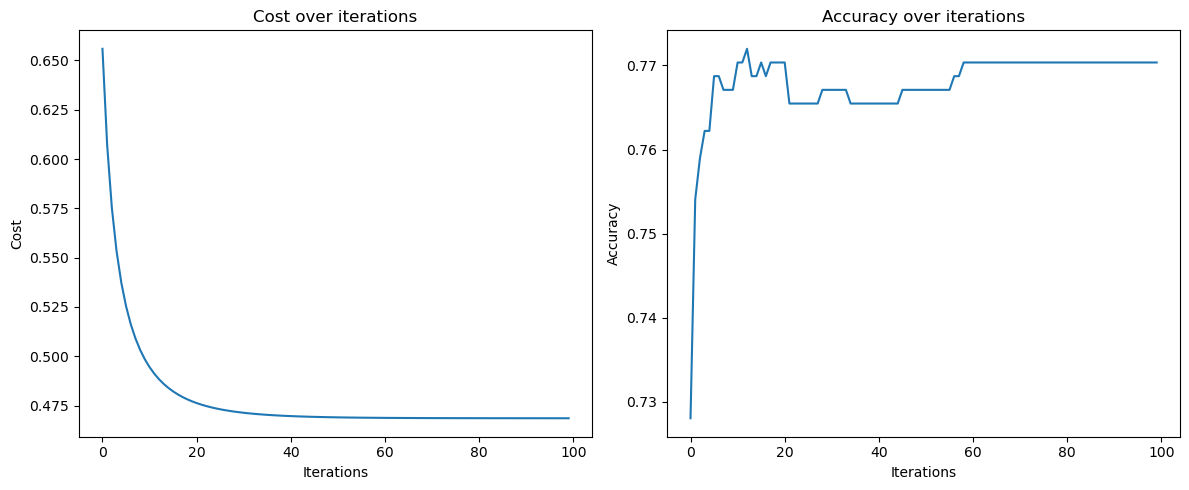

In [37]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [12]:
# Huấn luyện mô hình với tốc độ học 0.1 và số vòng lặp 500
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.1, num_iterations=500)

Iteration 0, Cost: 0.6923464595551089, Accuracy: 0.5325732899022801
Iteration 10, Cost: 0.6012266988598761, Accuracy: 0.754071661237785
Iteration 20, Cost: 0.5564335064148469, Accuracy: 0.757328990228013
Iteration 30, Cost: 0.5309592053009833, Accuracy: 0.7638436482084691
Iteration 40, Cost: 0.5148587590024948, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.5039307217530868, Accuracy: 0.7638436482084691
Iteration 60, Cost: 0.4961405137409609, Accuracy: 0.7654723127035831
Iteration 70, Cost: 0.4903895560096512, Accuracy: 0.7687296416938111
Iteration 80, Cost: 0.48603265982304855, Accuracy: 0.7671009771986971
Iteration 90, Cost: 0.48266559956844074, Accuracy: 0.7687296416938111
Iteration 100, Cost: 0.4800221363187283, Accuracy: 0.7687296416938111
Iteration 110, Cost: 0.4779199313464801, Accuracy: 0.7719869706840391
Iteration 120, Cost: 0.4762301794086486, Accuracy: 0.7719869706840391
Iteration 130, Cost: 0.47485958851295845, Accuracy: 0.7687296416938111
Iteration 140, Cost: 0.4737391

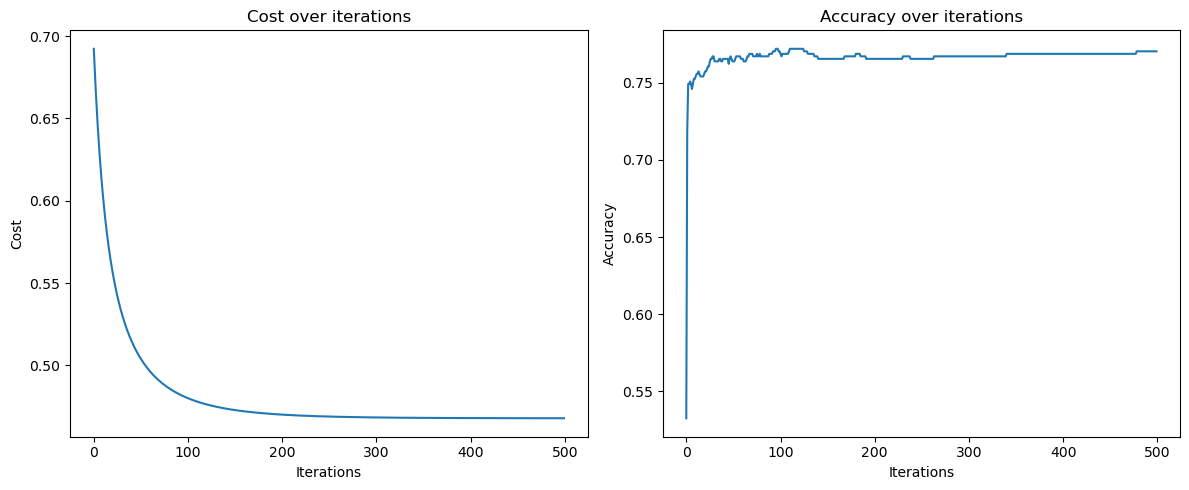

In [13]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Với tốc độ học 0.5, accuracy và cost hội tụ sau khoảng 100 vòng lặp.
Với tốc độ học 0.1, accuracy và cost hội tụ sau khoảng 480 vòng lặp.

# Stochastic Gradient Descent

In [26]:
def logistic_regression_nn_sgd(X, Y, learning_rate, num_iterations):
    m, n = X.shape
    W = np.random.randn(1, m) * 0.01
    b = 0
    costs = []
    accuracies = []

    for i in range(num_iterations):
        cost_sum = 0
        accuracy_sum = 0
        
        for j in range(n):
            X_j = X[:, j].reshape(-1, 1)
            Y_j = Y[:, j].reshape(-1, 1)

            Z_j = np.dot(W, X_j) + b
            A_j = sigmoid(Z_j)

            cost_j = compute_cost(Y_j, A_j)
            cost_sum += cost_j

            dZ_j = A_j - Y_j
            dW_j = np.dot(dZ_j, X_j.T)
            db_j = np.sum(dZ_j)

            W -= learning_rate * dW_j
            b -= learning_rate * db_j

            accuracy_j = np.mean((A_j > 0.5) == Y_j)
            accuracy_sum += accuracy_j
        
        cost_avg = cost_sum / n
        accuracy_avg = accuracy_sum / n
        costs.append(cost_avg)
        accuracies.append(accuracy_avg)

        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {cost_avg}, Accuracy: {accuracy_avg}")

    return W, b, costs, accuracies

In [31]:
# Huấn luyện mô hình với tốc độ học 0.001 và số vòng lặp 100
W, b, costs, accuracies = logistic_regression_nn_sgd(X_train_T, y_train_T, learning_rate=0.001, num_iterations=100)

Iteration 0, Cost: 0.655888802764123, Accuracy: 0.7280130293159609
Iteration 10, Cost: 0.4945198659376102, Accuracy: 0.7703583061889251
Iteration 20, Cost: 0.4762867153401835, Accuracy: 0.7703583061889251
Iteration 30, Cost: 0.4713650201526552, Accuracy: 0.7671009771986971
Iteration 40, Cost: 0.4696854992709709, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.4690443073835512, Accuracy: 0.7671009771986971
Iteration 60, Cost: 0.4687833662242637, Accuracy: 0.7703583061889251
Iteration 70, Cost: 0.46867273001651094, Accuracy: 0.7703583061889251
Iteration 80, Cost: 0.4686244151232462, Accuracy: 0.7703583061889251
Iteration 90, Cost: 0.4686027997525942, Accuracy: 0.7703583061889251


Thuật toán chỉ mất khoảng 60 vòng lặp để cost và accuracy hội tụ.

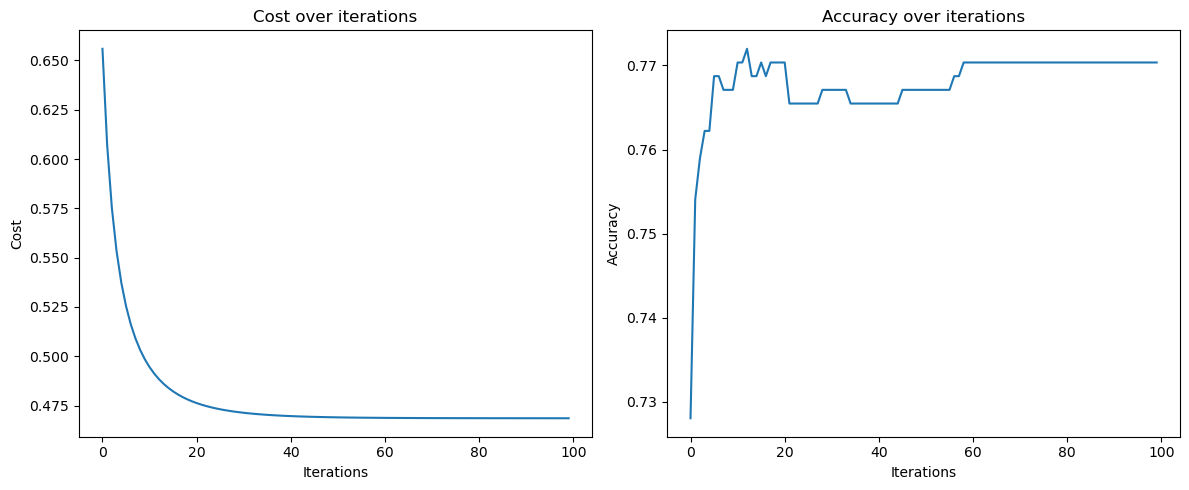

In [33]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [39]:
# Huấn luyện mô hình với tốc độ học 0.01 và số vòng lặp 100
W, b, costs, accuracies = logistic_regression_nn_sgd(X_train_T, y_train_T, learning_rate=0.01, num_iterations=100)

Iteration 0, Cost: 0.5546108434556836, Accuracy: 0.7654723127035831
Iteration 10, Cost: 0.47498715233265354, Accuracy: 0.7736156351791531
Iteration 20, Cost: 0.47497056720821057, Accuracy: 0.7736156351791531
Iteration 30, Cost: 0.47497017746603687, Accuracy: 0.7736156351791531
Iteration 40, Cost: 0.47497016701444983, Accuracy: 0.7736156351791531
Iteration 50, Cost: 0.4749701667476951, Accuracy: 0.7736156351791531
Iteration 60, Cost: 0.47497016674095344, Accuracy: 0.7736156351791531
Iteration 70, Cost: 0.4749701667407821, Accuracy: 0.7736156351791531
Iteration 80, Cost: 0.47497016674077874, Accuracy: 0.7736156351791531
Iteration 90, Cost: 0.4749701667407789, Accuracy: 0.7736156351791531


Tăng tốc độ học lên 0.01, sau 10 vòng lặp thì cost và accuracy đã hội tụ và độ chính xác cao hơn trước đó.

# Gradient Descent with Momentum

Gradient Descent with Momentum là một biến thể của Gradient Descent, giúp thuật toán hội tụ nhanh hơn bằng cách tích lũy "momentum" từ các bước cập nhật trước đó. Để áp dụng momentum, chúng ta cập nhật các tham số không chỉ dựa vào gradient hiện tại mà còn dựa vào các bước cập nhật trước đó.

Công thức cập nhật tham số với momentum như sau:

\begin{align*}
V_{dW} &= \beta V_{dW} + (1-\beta)\cdot dW\\
V_{db} &= \beta V_{db} + (1-\beta)\cdot db\\
W &= W - \alpha \cdot V_{dW}\\
b &= b - \alpha \cdot V_{db}
\end{align*}

Trong đó:
* $\alpha$ là tốc độ học.
* $\beta$ là hệ số momentum (thường được chọn là 0.9).
* $V_{dW}$ và $V_{db}$ là giá trị moving average của gradient.
* $dW$ và $db$ là gradient của hàm chi phí đối với $W$ và $b$ tương ứng.

In [48]:
def logistic_regression_nn_momentum(X, Y, learning_rate, num_iterations, beta=0.9):
    m, n = X.shape
    W = np.random.randn(1, m) * 0.01
    b = 0
    costs = []
    accuracies = []

    # Khởi tạo giá trị momentum
    V_dW = np.zeros((1, m))
    V_db = 0

    for i in range(num_iterations):
        Z = np.dot(W, X) + b
        A = sigmoid(Z)
        cost = compute_cost(Y, A)
        costs.append(cost)

        dZ = A - Y
        dW = 1/n * np.dot(dZ, X.T)
        db = 1/n * np.sum(dZ)

        # Cập nhật giá trị momentum
        V_dW = beta * V_dW + (1 - beta) * dW
        V_db = beta * V_db + (1 - beta) * db

        # Cập nhật tham số với momentum
        W -= learning_rate * V_dW
        b -= learning_rate * V_db

        accuracy = np.mean((A > 0.5) == Y)
        accuracies.append(accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

    return W, b, costs, accuracies

In [52]:
# Huấn luyện mô hình với tốc độ học 0.1 và số vòng lặp 1000
W, b, costs, accuracies = logistic_regression_nn_momentum(X_train_T, y_train_T, learning_rate=0.1, num_iterations=1000)

Iteration 0, Cost: 0.689146379716478, Accuracy: 0.6514657980456026
Iteration 100, Cost: 0.47862830532918216, Accuracy: 0.7687296416938111
Iteration 200, Cost: 0.4695965040808245, Accuracy: 0.7654723127035831
Iteration 300, Cost: 0.4682084568832529, Accuracy: 0.7671009771986971
Iteration 400, Cost: 0.4679226797774369, Accuracy: 0.7687296416938111
Iteration 500, Cost: 0.4678567495532052, Accuracy: 0.7703583061889251
Iteration 600, Cost: 0.467840612682349, Accuracy: 0.7703583061889251
Iteration 700, Cost: 0.4678365181839829, Accuracy: 0.7703583061889251
Iteration 800, Cost: 0.4678354535462043, Accuracy: 0.7703583061889251
Iteration 900, Cost: 0.4678351717477261, Accuracy: 0.7703583061889251


Với tốc độ học 0.1, cost và acurracy hội tụ sau 500 vòng lặp, không nhanh hơn SGD.